# Regularized Linear Regression and Bias v.s. Variance

Week 6のバイアス-バリアンス問題について

In [1]:
import math, random
import numpy as np
import scipy.io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sns.set_style('whitegrid')

import sys, os
sys.path.append(os.path.dirname('../common/'))
from common import *

default_figsize = plt.rcParams['figure.figsize']

## Regularized Linear Regression

### Visualizing the dataset

In [2]:
dataset = scipy.io.loadmat('ex5data1.mat')
xs = dataset['X']
ys = dataset['y']

Xtrain = np.c_[np.ones((xs.shape[0], 1)), xs]
ytrain = ys.copy()

saved assets/week06_train.png


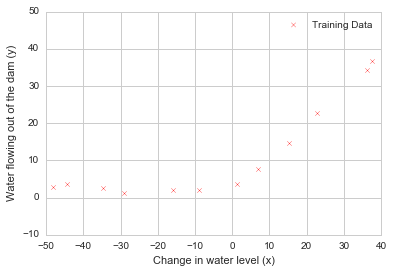

In [3]:
def plot_data():
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(Xtrain[:,1], ytrain, color='red', marker='x', label='Training Data')
    ax.legend()
    ax.set_xlabel('Change in water level (x)')
    ax.set_ylabel('Water flowing out of the dam (y)')
    return ax

ax = plot_data()
ax.set_xlim(-50, 40)
ax.set_ylim(-10, 50)
savefig('week06_train.png')

### Regularized linear regression cost function and gradient

In [4]:
%run bias_vs_variance.py

In [5]:
theta = np.ones((Xtrain.shape[1], 1))
cost_function(theta, Xtrain, ytrain, 1.0)

(303.99319222026429, array([[ -15.30301567],
        [ 598.25074417]]))

### Fitting linear regression

In [6]:
theta, J_history = train_linear_regression(Xtrain, ytrain, 0.)
theta

array([[ 13.08790351],
       [  0.36777923]])

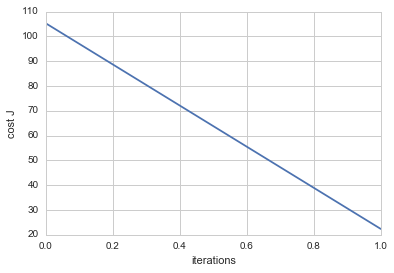

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(J_history)
ax.set_xlabel('iterations')
ax.set_ylabel('cost J')

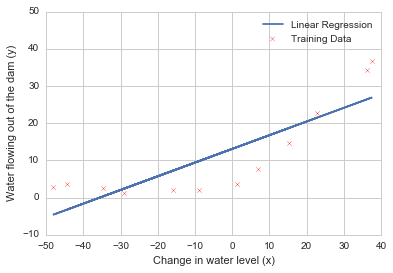

In [8]:
ypred = predict(theta, Xtrain)
ax = plot_data()
ax.set_xlim(-50, 40)
ax.set_ylim(-10, 50)
ax.plot(Xtrain[:,1], ypred, label='Linear Regression')
ax.legend()

## Bias-Variance

### Learning curves

In [9]:
%run bias_vs_variance.py

In [10]:
xvals = dataset['Xval']
yvals = dataset['yval']

Xcv = np.c_[np.ones((xvals.shape[0], 1)), xvals]
ycv = yvals.copy()

xtests = dataset['Xtest']
ytests = dataset['ytest']

Xtest = np.c_[np.ones((xtests.shape[0], 1)), xtests]
ytest = ytests.copy()

Xtrain.shape, ytrain.shape, Xcv.shape, ycv.shape, Xtest.shape, ytest.shape

((12, 2), (12, 1), (21, 2), (21, 1), (21, 2), (21, 1))

In [11]:
Jtrain, Jcv = learning_curve(Xtrain, ytrain, Xcv, ycv, 0.)

saved assets/week06_learning_curve.png


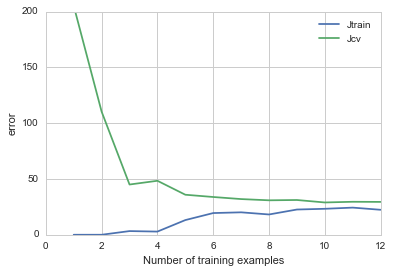

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_ylim(0,200)
ax.plot(Jtrain, label='Jtrain')
ax.plot(Jcv, label='Jcv')
ax.legend()
ax.set_xlabel('Number of training examples')
ax.set_ylabel('error')
savefig('week06_learning_curve.png')

## Polynomial regression

In [13]:
%run bias_vs_variance.py

In [14]:
poly_features(Xtrain[:,1], 3)

array([[ -1.59367581e+01,   2.53980260e+02,  -4.04762197e+03],
       [ -2.91529792e+01,   8.49896197e+02,  -2.47770062e+04],
       [  3.61895486e+01,   1.30968343e+03,   4.73968522e+04],
       [  3.74921873e+01,   1.40566411e+03,   5.27014222e+04],
       [ -4.80588295e+01,   2.30965109e+03,  -1.10999128e+05],
       [ -8.94145794e+00,   7.99496701e+01,  -7.14866612e+02],
       [  1.53077929e+01,   2.34328523e+02,   3.58705250e+03],
       [ -3.47062658e+01,   1.20452489e+03,  -4.18045609e+04],
       [  1.38915437e+00,   1.92974986e+00,   2.68072045e+00],
       [ -4.43837599e+01,   1.96991814e+03,  -8.74323736e+04],
       [  7.01350208e+00,   4.91892115e+01,   3.44988637e+02],
       [  2.27627489e+01,   5.18142738e+02,   1.17943531e+04]])

In [15]:
feature_standardize(Xtrain[:,1].reshape(-1,1))

(array([[-0.3782437 ],
        [-0.8389201 ],
        [ 1.43871736],
        [ 1.4841233 ],
        [-1.49791929],
        [-0.13440928],
        [ 0.71084425],
        [-1.03249041],
        [ 0.22568376],
        [-1.36981778],
        [ 0.42173105],
        [ 0.97070085]]), array([[-5.08542635]]), array([[ 28.68873076]]))

In [16]:
# scikit-learnの StandardScalerで検算
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrain[:,1].reshape(-1,1))
scaler.transform(Xtrain[:,1].reshape(-1, 1)), scaler.mean_, scaler.scale_

(array([[-0.3782437 ],
        [-0.8389201 ],
        [ 1.43871736],
        [ 1.4841233 ],
        [-1.49791929],
        [-0.13440928],
        [ 0.71084425],
        [-1.03249041],
        [ 0.22568376],
        [-1.36981778],
        [ 0.42173105],
        [ 0.97070085]]), array([-5.08542635]), array([ 28.68873076]))

In [17]:
p = 8

XpolyTrain, mu, sigma = feature_standardize(poly_features(Xtrain[:,1], p))
XpolyTrain = np.c_[np.ones((XpolyTrain.shape[0], 1)), XpolyTrain]

XpolyCV = feature_standardize(poly_features(Xcv[:,1], p), mu, sigma)[0]
XpolyCV = np.c_[np.ones((XpolyCV.shape[0], 1)), XpolyCV]

XpolyTest = feature_standardize(poly_features(Xtest[:,1], p), mu, sigma)[0]
XpolyTest = np.c_[np.ones((XpolyTest.shape[0], 1)), XpolyTest]

#XpolyTrain[0,:]

### Learning Polynomial Regression

In [18]:
lmd = 0.
theta, J_history = train_linear_regression(XpolyTrain, ytrain, lmd)

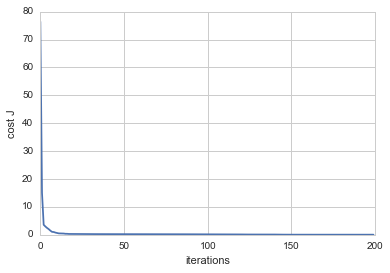

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(J_history)
ax.set_xlabel('iterations')
ax.set_ylabel('cost J')

In [20]:
Xmin, Xmax = np.min(Xtrain[:,1]), np.max(Xtrain[:,1])
X = np.linspace(Xmin - 20, Xmax + 20, num=50)
Xpoly = feature_standardize(poly_features(X, p), mu, sigma)[0]
Xpoly = np.c_[np.ones((Xpoly.shape[0], 1)), Xpoly]

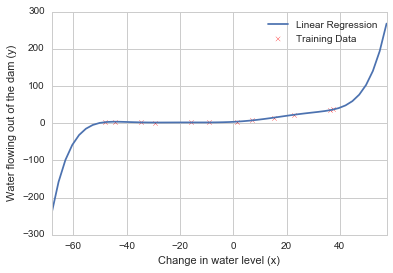

In [21]:
ypred = predict(theta, Xpoly)
ax = plot_data()
ax.set_xlim(np.min(X), np.max(X))
ax.plot(X, ypred, label='Linear Regression')
ax.legend()

saved assets/week06_poly_learning_curve.png


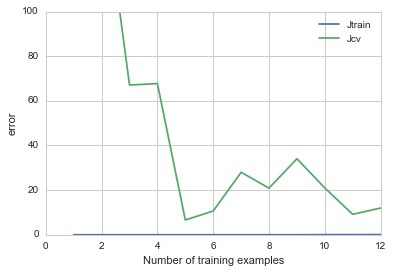

In [22]:
Jtrain, Jcv = learning_curve(XpolyTrain, ytrain, XpolyCV, ycv, lmd)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_ylim(0,100)
ax.plot(Jtrain, label='Jtrain')
ax.plot(Jcv, label='Jcv')
ax.legend()
ax.set_xlabel('Number of training examples')
ax.set_ylabel('error')
savefig('week06_poly_learning_curve.png')

#### for λ = 1.0

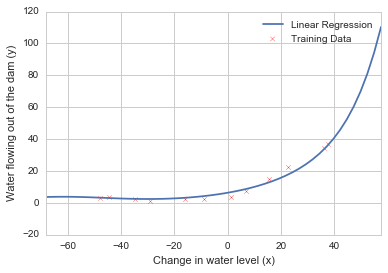

In [23]:
lmd = 1.
theta, J_history = train_linear_regression(XpolyTrain, ytrain, lmd)

ypred = predict(theta, Xpoly)
ax = plot_data()
ax.set_xlim(np.min(X), np.max(X))
ax.plot(X, ypred, label='Linear Regression')
ax.legend()

saved assets/week06_poly_learning_curve_lmd1.png


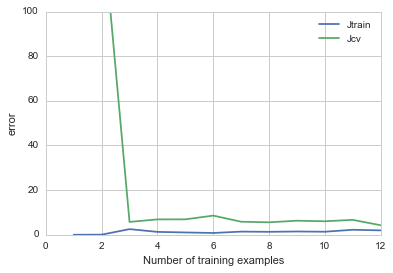

In [24]:
Jtrain, Jcv = learning_curve(XpolyTrain, ytrain, XpolyCV, ycv, lmd)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_ylim(0,100)
ax.plot(Jtrain, label='Jtrain')
ax.plot(Jcv, label='Jcv')
ax.legend()
ax.set_xlabel('Number of training examples')
ax.set_ylabel('error')
savefig('week06_poly_learning_curve_lmd1.png')

### Selecting λ using a cross validation set

In [25]:
%run bias_vs_variance.py

In [26]:
lmds = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
results = validation_curve(XpolyTrain, ytrain, XpolyCV, ycv, lmds)

results

[{'cv_error': 7.757090765414536,
  'lambda': 0,
  'train_error': 0.066912483078815102},
 {'cv_error': 15.82523380249952,
  'lambda': 0.001,
  'train_error': 0.15067068481706447},
 {'cv_error': 15.963873610337654,
  'lambda': 0.003,
  'train_error': 0.16693742733743461},
 {'cv_error': 17.151193811071494,
  'lambda': 0.01,
  'train_error': 0.21795414298195814},
 {'cv_error': 13.218120016618252,
  'lambda': 0.03,
  'train_error': 0.27518382625075266},
 {'cv_error': 7.9272104695759982,
  'lambda': 0.1,
  'train_error': 0.43863533156111323},
 {'cv_error': 4.7608135676748873,
  'lambda': 0.3,
  'train_error': 0.86816195078799208},
 {'cv_error': 4.263358668018026,
  'lambda': 1,
  'train_error': 1.9586948418751415},
 {'cv_error': 3.8321763824662574,
  'lambda': 3,
  'train_error': 4.5251048134568643},
 {'cv_error': 8.8897247272110338,
  'lambda': 10,
  'train_error': 14.82580826014345}]

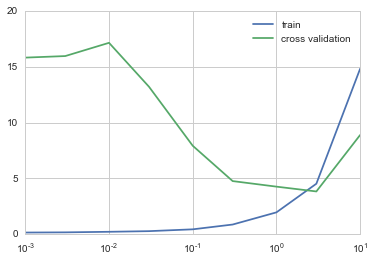

In [27]:
xs  = [r['lambda'] for r in results]
ys1 = [r['train_error'] for r in results]
ys2 = [r['cv_error'] for r in results]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_ylim(0, 20)
ax.set_xscale('log')
ax.plot(xs, ys1, label='train')
ax.plot(xs, ys2, label='cross validation')
ax.legend()

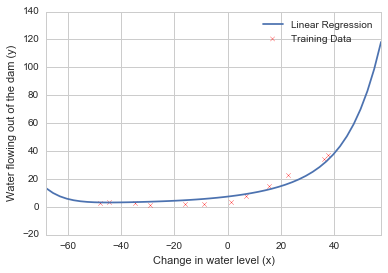

In [28]:
lmd = 3.
theta, J_history = train_linear_regression(XpolyTrain, ytrain, lmd)

ypred = predict(theta, Xpoly)
ax = plot_data()
ax.set_xlim(np.min(X), np.max(X))
ax.plot(X, ypred, label='Linear Regression')
ax.legend()

saved assets/week06_poly_learning_curve_lmd3.png


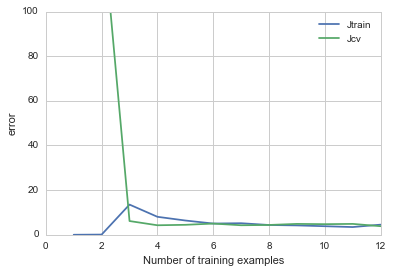

In [29]:
Jtrain, Jcv = learning_curve(XpolyTrain, ytrain, XpolyCV, ycv, lmd)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_ylim(0,100)
ax.plot(Jtrain, label='Jtrain')
ax.plot(Jcv, label='Jcv')
ax.legend()
ax.set_xlabel('Number of training examples')
ax.set_ylabel('error')
savefig('week06_poly_learning_curve_lmd3.png')